## Background

Retinal optical coherence tomography (OCT) is an imaging technique used to capture high-resolution cross sections of the retinas of living patients. Approximately 30 million OCT scans are performed each year, and the analysis and interpretation of these images takes up a significant amount of time (Swanson and Fujimoto, 2017).

Here are examples of the four classes/labels we have images of:

![Image of the different classes](https://i.imgur.com/fSTeZMd.png)

(A) (Far left) choroidal neovascularization (CNV) with neovascular membrane (white arrowheads) and associated subretinal fluid (arrows). (Middle left) Diabetic macular edema (DME) with retinal-thickening-associated intraretinal fluid (arrows). (Middle right) Multiple drusen (arrowheads) present in early AMD. (Far right) Normal retina with preserved foveal contour and absence of any retinal fluid/edema.

The dataset is organized into 3 folders (train, test, val) and contains subfolders for each image category (NORMAL,CNV,DME,DRUSEN). There are 84,495 X-Ray images (JPEG) and 4 categories (NORMAL,CNV,DME,DRUSEN).

### Citation:
![Citation](https://i.imgur.com/8AUJkin.png)


## Setup

Run on Google Colab. The beginning of the notebook contains some Colab specific setup stuff such as integrating with Google Drive (primarily to persistenty store the trained models)

Data was sourced from Kaggle: https://www.kaggle.com/paultimothymooney/kermany2018. This was done thru the Kaggle Api (API credentials needed). The compressed size of the data is something around 5.5 GB.

For the deep learning I used fastai v1 CNN with pretrained (imagenet) resnet50 architecture.



In [1]:
import os
from google.colab import drive

# Mount Google Drive to Colab and set some paths
drive.mount('/content/gdrive', force_remount=True)
root_dir = "/content/gdrive/My Drive/"
base_dir = root_dir + 'kaggle/Retinal_OCT_img'

models_dir = base_dir + "/saved_models"

if not os.path.exists(models_dir):
  os.makedirs(models_dir)

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


In [2]:
# Setup/update fastai package
!curl -s https://course.fast.ai/setup/colab | bash

Updating fastai...
Done.


In [0]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [0]:
from fastai.vision import *

import pandas as pd

In [5]:
# kaggle module used to download the data from kaggle
!pip install kaggle --upgrade

Requirement already up-to-date: kaggle in /usr/local/lib/python3.6/dist-packages (1.5.5)


In [0]:
# Just some housekeeping to put the Kaggle credentials file into place
! mkdir -p ~/.kaggle/
!cp "gdrive/My Drive/fastai-v3/kaggle.json" ~/.kaggle/

In [7]:
# Download ~~5.5 GB of zipped data
!kaggle datasets download -d paultimothymooney/kermany2018

100% 5.42G/5.42G [00:58<00:00, 140MB/s]
100% 5.42G/5.42G [00:58<00:00, 99.7MB/s]


In [0]:
#!pwd
#!ls -la

In [9]:
path = Config.data_path()/'Retinal_OCT'
path.mkdir(parents=True, exist_ok=True)
path

PosixPath('/root/.fastai/data/Retinal_OCT')

In [0]:
# Unzip (takes a little while)
!unzip -q -n kermany2018.zip -d {path}

In [11]:
!ls {path}

OCT2017.zip


In [12]:
# Contained another zip. Unzip it as well
!unzip -q -n {path}/OCT2017.zip -d {path}/OCT2017

warning [/root/.fastai/data/Retinal_OCT/OCT2017.zip]:  4294967296 extra bytes at beginning or within zipfile
  (attempting to process anyway)
file #1:  bad zipfile offset (local header sig):  4294967296
  (attempting to re-compensate)
file #122249:  bad zipfile offset (local header sig):  51410
  (attempting to re-compensate)


In [0]:
# Could remove the original zips now. But didn't.

In [14]:
(path/"OCT2017"/"OCT2017 ").ls()

[PosixPath('/root/.fastai/data/Retinal_OCT/OCT2017/OCT2017 /test'),
 PosixPath('/root/.fastai/data/Retinal_OCT/OCT2017/OCT2017 /.DS_Store'),
 PosixPath('/root/.fastai/data/Retinal_OCT/OCT2017/OCT2017 /train'),
 PosixPath('/root/.fastai/data/Retinal_OCT/OCT2017/OCT2017 /val')]

In [15]:
(path/"OCT2017"/"OCT2017 " /"val"/"DME").ls()

[PosixPath('/root/.fastai/data/Retinal_OCT/OCT2017/OCT2017 /val/DME/DME-9721607-2.jpeg'),
 PosixPath('/root/.fastai/data/Retinal_OCT/OCT2017/OCT2017 /val/DME/DME-9925591-2.jpeg'),
 PosixPath('/root/.fastai/data/Retinal_OCT/OCT2017/OCT2017 /val/DME/DME-9583225-1.jpeg'),
 PosixPath('/root/.fastai/data/Retinal_OCT/OCT2017/OCT2017 /val/DME/DME-9721607-1.jpeg'),
 PosixPath('/root/.fastai/data/Retinal_OCT/OCT2017/OCT2017 /val/DME/DME-9603124-1.jpeg'),
 PosixPath('/root/.fastai/data/Retinal_OCT/OCT2017/OCT2017 /val/DME/DME-9655949-1.jpeg'),
 PosixPath('/root/.fastai/data/Retinal_OCT/OCT2017/OCT2017 /val/DME/.DS_Store'),
 PosixPath('/root/.fastai/data/Retinal_OCT/OCT2017/OCT2017 /val/DME/DME-9583225-2.jpeg'),
 PosixPath('/root/.fastai/data/Retinal_OCT/OCT2017/OCT2017 /val/DME/DME-9925591-1.jpeg')]

The dataset is organized into 3 folders (train, test, val) and contains subfolders for each image category (NORMAL,CNV,DME,DRUSEN). There are 84,495 X-Ray images (JPEG) and 4 categories (NORMAL,CNV,DME,DRUSEN).

Images are labeled as (disease)-(randomized patient ID)-(image number by this patient) and split into 4 directories: CNV, DME, DRUSEN, and NORMAL.



In [16]:
# How many images?
categories = ["NORMAL", "CNV", "DME", "DRUSEN"]
  
train_path = path/"OCT2017"/"OCT2017 /train"
valid_path = path/"OCT2017"/"OCT2017 /val"
test_path = path/"OCT2017"/"OCT2017 /test"

datasets = [train_path, valid_path, test_path]

ds_names =[]
category_names = []
num_imgs = []

for ds_path in datasets:
  for cat in categories: 
    num_jpegs = len(list((ds_path/cat).glob("*.jpeg")))
    ds_names.append(ds_path.name)
    category_names.append(cat)
    num_imgs.append(num_jpegs)

    
num_images_df = pd.DataFrame({"dataset": ds_names, "category": category_names, "num_images": num_imgs})
num_images_df = num_images_df.pivot(index="category", columns="dataset", values="num_images")
num_images_df

dataset,test,train,val
category,,,
CNV,242,37205,8
DME,242,11348,8
DRUSEN,242,8616,8
NORMAL,242,26315,8


In [37]:
# Lets check also how the train, valid, test sets are constructed. 
# Specifically, whether the same patient can appear in different sets. That might not be the perfect situation (dunno how bad it will be in this case)
# a more accurate test of generalization is to check whether the model works for another patient. Images for the same patient seen in train set can be unfairly easy to predict.

import os

# For train
fnames = []
for (dirpath, dirnames, filenames) in os.walk(train_path):
  fnames.extend((file for file in filenames if '.jpeg' in file))
  
train_patient_ids = {fname.split("-")[1] for fname in fnames}


# For val
fnames = []
for (dirpath, dirnames, filenames) in os.walk(valid_path):
  fnames.extend((file for file in filenames if '.jpeg' in file))
  
valid_patient_ids = {fname.split("-")[1] for fname in fnames}

# For test
fnames = []
for (dirpath, dirnames, filenames) in os.walk(test_path):
  fnames.extend((file for file in filenames if '.jpeg' in file))
  
test_patient_ids = {fname.split("-")[1] for fname in fnames}


common_patients_trainval = train_patient_ids.intersection(valid_patient_ids)
common_patients_traintest = train_patient_ids.intersection(test_patient_ids)

print("Number of common patients between train and valid datasets:", len(common_patients_trainval), f" - out of valid set's {len(valid_patient_ids)} patients")
print("Number of common patients between train and test datasets:", len(common_patients_traintest), f" - out of test set's {len(test_patient_ids)} patients")

Number of common patients between train and valid datasets: 21  - out of valid set's 25 patients
Number of common patients between train and test datasets: 546  - out of test set's 609 patients


The train-valid-test split seems on the surface less than optimal (same patients in different sets). This is the split used in the original dataset. I did not create a new split.

In [0]:
# CHECK IMAGE SIZES from a sample
import glob
import numpy as np

from PIL import Image


def get_img_size(filepath):
    """returns width, height in px tuple"""
    img = Image.open(filepath) 
    width, height = img.size
    try:
      num_channels = np.array(img).shape[2]
    except IndexError:
      num_channels = 1

    return width, height, num_channels


In [16]:

image_files = [f for f in (path / "OCT2017"/"OCT2017 "/"train"/"CNV").glob("*.jpeg")]
print(len(image_files))

37205


In [17]:
sizes = [get_img_size(img_fn) for img_fn in image_files[:2000]]
sizes_by_dim = [channel for channel in zip(*sizes)]

list(map(np.mean, sizes_by_dim))

# likely all 256 by 256, 4 channels

[747.072, 496.0, 1.0]

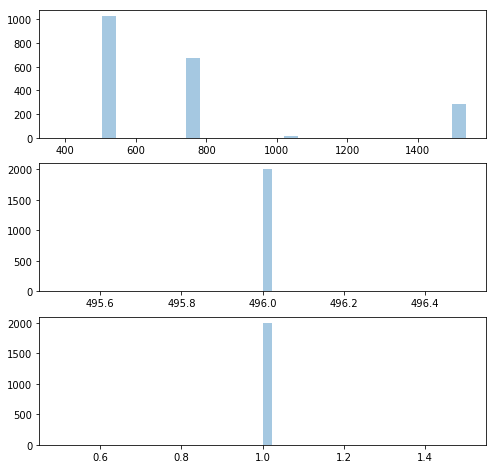

In [19]:
# Barplots of the image sizes, one plot per dimension

# Images sizes from a sample
# grayscale, 1 channel

import matplotlib.pyplot as plt
import seaborn as sns


f, (ax1, ax2, ax3) = plt.subplots(3,1, figsize=(8,8))

sns.distplot(sizes_by_dim[0], kde=False, ax=ax1)
sns.distplot(sizes_by_dim[1], kde=False, ax=ax2)
sns.distplot(sizes_by_dim[2], kde=False, ax=ax3)

Set a data source:

The valid set is tiny. I noticed it afterwards. It is better to use the test (or val + test) as the validation set being scored but not trained on.

I will switch later in this notebook to use the test set

In [0]:
np.random.seed(42)

src = (ImageList.from_folder(path=path/"OCT2017"/"OCT2017 ")
       .split_by_folder(valid="val")
       .label_from_folder())  # split the multiple labels


Transforms for image augmentation:

Not sure how much variance there is in these images - I did not investigate that. Is e.g. the orientation always the same? I used more moderate amount of transformations.

In [0]:

tfms = get_transforms(flip_vert=False, max_zoom=1.05, max_warp=0.)

In [0]:
data = (src.transform(tfms, size=224)
        .databunch().normalize(imagenet_stats))

# always use the normalization stats that were used to train the model

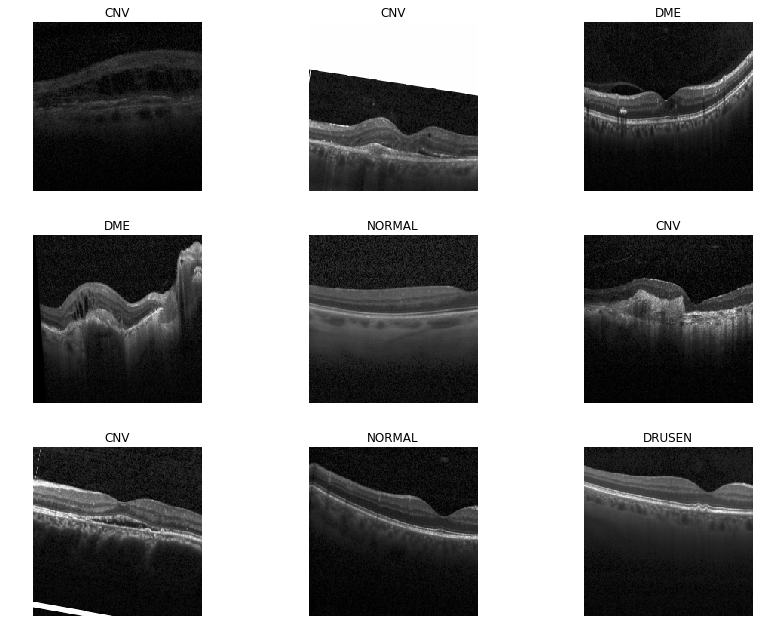

In [23]:
data.show_batch(rows=3, figsize=(12,9))

In [0]:
# Used resnet50
arch = models.resnet50

In [25]:
learn = cnn_learner(data, arch, metrics=accuracy)

Downloading: "https://download.pytorch.org/models/resnet50-19c8e357.pth" to /root/.cache/torch/checkpoints/resnet50-19c8e357.pth
100%|██████████| 102502400/102502400 [00:01<00:00, 95408494.17it/s]


In [67]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


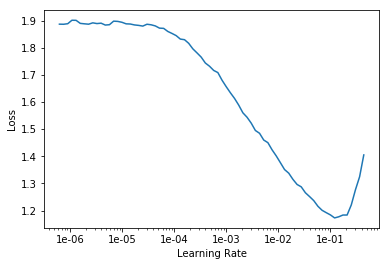

In [68]:
learn.recorder.plot()

In [69]:
lr = 1e-2
learn.fit_one_cycle(1, slice(lr))  #

epoch,train_loss,valid_loss,accuracy,time
0,0.191768,0.055213,0.968750,38:42


In [0]:
# Save model to Google Drive
learn.save(os.path.join(models_dir, 'stage-1-rn50'))

In [0]:
# Fine tune whole model
learn.unfreeze()


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


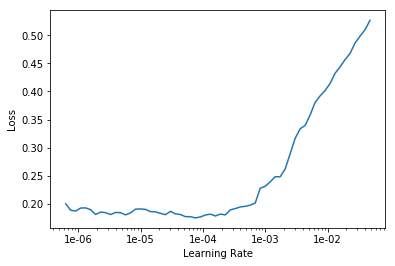

In [74]:
learn.lr_find()
learn.recorder.plot()

In [76]:
learn.fit_one_cycle(1, slice(5e-6, 2e-4))

epoch,train_loss,valid_loss,accuracy,time
0,0.144467,0.025431,1.000000,41:49


In [0]:
learn.save(os.path.join(models_dir, 'stage-2-rn50'))

In [0]:
learn.load(os.path.join(models_dir, 'stage-2-rn50'))

## Interpretation

Based at this part on the validation set of only 32 images

In [0]:
interp = ClassificationInterpretation.from_learner(learn)

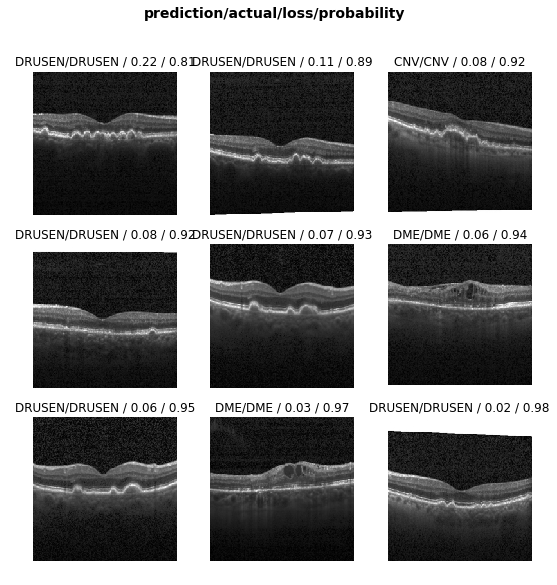

In [58]:
interp.plot_top_losses(9, figsize=(9,9))

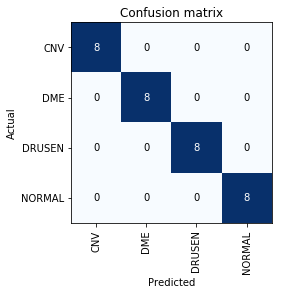

In [59]:
interp.plot_confusion_matrix()

## Validate instead on the bigger "test" dataset (where we have the labels as well). 

Use this as the validation dataset. The valid dataset is so tiny.

In [0]:
data_test = (ImageList.from_folder(path=path/"OCT2017"/"OCT2017 ")
        .split_by_folder(train='train', valid='test')
        .label_from_folder()
        .transform(tfms, size=224)
        .databunch()
        .normalize(imagenet_stats)
       ) 



In [28]:
learn.data = data_test
#learn.data.valid_ds[0][0]
len(learn.data.valid_ds.x)

968

In [0]:
# Fitted for something like 10 epochs (takes time). COuld still benefit from more training.
# Valid/test set prediciton accuracy seems nice.
learn.unfreeze()
learn.fit_one_cycle(12, slice(5e-6, 2e-4))

# 10 epochs or so. acc 0.9969


epoch,train_loss,valid_loss,accuracy,time
epoch,train_loss,valid_loss,accuracy,time
0,0.068102,0.013745,0.996901,33:53
0,0.068102,0.013745,0.996901,33:53
1,0.077176,0.019764,0.994835,33:29
1,0.077176,0.019764,0.994835,33:29


underfitting... loss for train higher than that for valid.

Typically validation loss should be similar to but slightly higher than training loss. As long as validation loss is lower than or even equal to training loss one should keep doing more training.

Funnily enough, some over-fitting is nearly always a good thing. All that matters in the end is: is the validation loss as low as you can get it (and/or the validation accuracy as high)? This often occurs when the training loss is quite a bit lower.




AttributeError: ignored

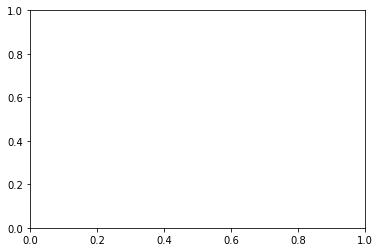

In [40]:
learn.recorder.plot_losses()  # is not saved... would show train and valid loss vs. num_batches processed.

In [0]:
learn.save(os.path.join(models_dir, 'stage-3-rn50'))  # something like 10 epochs


In [29]:
learn.load(os.path.join(models_dir, 'stage-3-rn50')) 

Learner(data=ImageDataBunch;

Train: LabelList (83484 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
DRUSEN,DRUSEN,DRUSEN,DRUSEN,DRUSEN
Path: /root/.fastai/data/Retinal_OCT/OCT2017/OCT2017 ;

Valid: LabelList (968 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
DRUSEN,DRUSEN,DRUSEN,DRUSEN,DRUSEN
Path: /root/.fastai/data/Retinal_OCT/OCT2017/OCT2017 ;

Test: None, model=Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): Bottleneck(
        (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn1): B

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


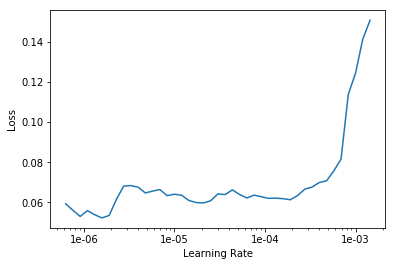

In [90]:
learn.lr_find()
learn.recorder.plot()

In [0]:
# some interpretaiton basedthe larger test data as validation dataset
interp = ClassificationInterpretation.from_learner(learn)


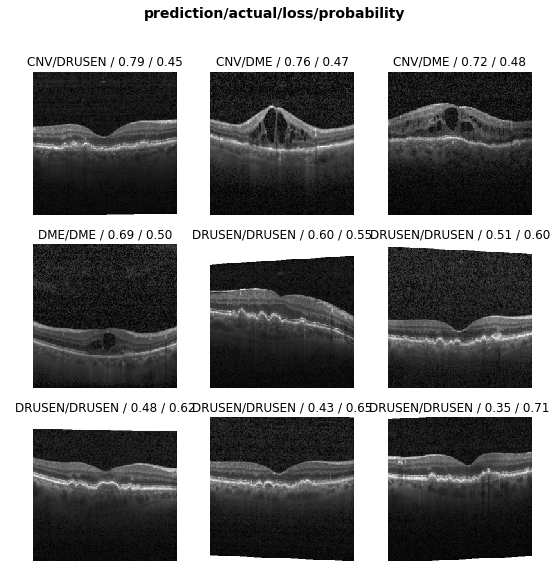

In [31]:
interp.plot_top_losses(9, figsize=(9,9))

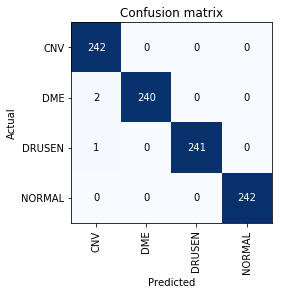

In [32]:
interp.plot_confusion_matrix()

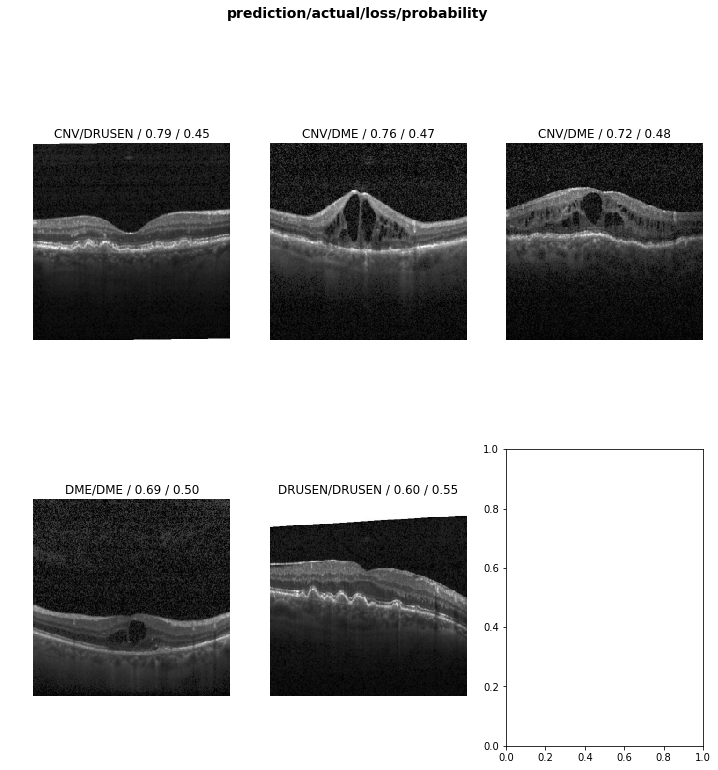

In [36]:
interp.plot_top_losses(5)

## Predict a single image

In [0]:
img = learn.data.train_ds[0][0]
learn.predict(img)

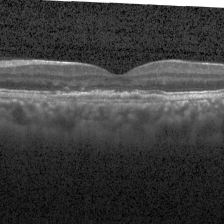

In [82]:
img